# MarkovChain.py Examples
Useful functions and classes for ISEN 340: Operations Research II

Author: Christopher Abib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from MarkovChain import (MarkovChainSteadyState,
                         first_passage,
                         expected_visits,
                         mean_first_passage,
                         build_lam_matrix,
                         random_P_matrix,
                         CTMC,
                         MMC)
plt.style.use('seaborn-darkgrid')

## np.matrix Operations
Numpy comes built in with a bunch of useful methods and shortcuts when working with `np.matrix`.
Here are the [Docs](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html).

In [2]:
# Create a matrix.
A = np.matrix(
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 0]]
)
A

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]])

In [3]:
# Transpose a matrix
A.T

matrix([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 0]])

In [4]:
# Two ways to invert a matrix.
display(A.I)
A ** -1

matrix([[-1.77777778,  0.88888889, -0.11111111],
        [ 1.55555556, -0.77777778,  0.22222222],
        [-0.11111111,  0.22222222, -0.11111111]])

matrix([[-1.77777778,  0.88888889, -0.11111111],
        [ 1.55555556, -0.77777778,  0.22222222],
        [-0.11111111,  0.22222222, -0.11111111]])

In [5]:
# Casting arithmatic and multiplication/division operations.
display(A + 1)
A * 2

matrix([[2, 3, 4],
        [5, 6, 7],
        [8, 9, 1]])

matrix([[ 2,  4,  6],
        [ 8, 10, 12],
        [14, 16,  0]])

In [6]:
# Two different ways to raise a matrix to the power of 3.
display(A ** 3)
A * A * A

matrix([[279, 360, 306],
        [684, 873, 684],
        [738, 900, 441]])

matrix([[279, 360, 306],
        [684, 873, 684],
        [738, 900, 441]])

In [7]:
# Row and column matrices.
B = np.matrix([1, 0, 0])
display(B)
B.T

matrix([[1, 0, 0]])

matrix([[1],
        [0],
        [0]])

In [8]:
# Matrix multiplication examples.
display('A', A, 'B', B)
display('A * B', B * A)
display('A.I * B.T', A.I * B.T)

'A'

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]])

'B'

matrix([[1, 0, 0]])

'A * B'

matrix([[1, 2, 3]])

'A.I * B.T'

matrix([[-1.77777778],
        [ 1.55555556],
        [-0.11111111]])

## MarkovChain Module
This module contains a bunch of useful tools for this class. In order for it to work for you, the file must be in the same folder as the jupyter notebook you are using.

In [29]:
# Use the help function to see information for class and function.
# You can also hover over the code with you mouse if you are using a smart IDE like DataSpell.
# Uncomment the line below if you want to see what it prints.
import MarkovChain
# help(MarkovChain)

## Markov Chains
This class computes and visualizes the steady state of a Markov process.

In [10]:
# We first create a probability matrix that represents a Markov Process that we have modeled.
P1 = np.matrix(
    [[.2, .8],
     [.5, .5]]
)

# Then, it is passed as an argument to create a `MarkovChainSteadyState` object.
ss = MarkovChainSteadyState(P=P1)
# Finally we can access the `pi` attribute of the object to see the steady state probability.
ss.pi

matrix([[0.38461538, 0.61538462]])

In [11]:
# We can also see how many steps it took to reach that answer.
ss.steps

15

π = [[0.38461538 0.61538462]]
steps = 15


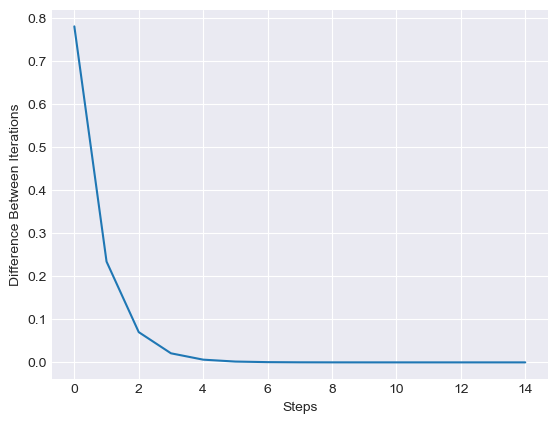

In [12]:
# The `summary` method was provided to cleanly present the results of the calculations.
ss.summary()

In [13]:
# All of these classes have a custom __str__ method, so we can actually see information by just putting the object in the last line of a cell.
MarkovChainSteadyState(P=P1)

π = [[0.38461538 0.61538462]]
steps = 15

In [14]:
# We can also mess around with how precise we want the calculations to be.
ss = MarkovChainSteadyState(P=P1,
                            significance=0.001,
                            max_iterations=10_000)
ss

π = [[0.3844808 0.6155192]]
steps = 7

## Expected Visits
Calculates the expected number of visits to a state `stop` starting from state `start` over the course of `n` state transitions for a given probability matrix.

In [15]:
P2 = np.matrix(
    [[0, .5, .25, .25],
     [.8, 0, .1, .1],
     [.8, .1, 0, .1],
     [.8, .1, .1, 0]]
)

# The expected number of visits to state 3 during 10 state transitions, given we started at state 0.
expected_visits(P2, 0, 3, 10)

1.5653319882500005

## First Passage
Calculates the first passage probability for a given probability matrix.

Indices for `start` and `stop` begin at zero.

In [16]:
P3 = np.matrix(
    [[.4, .3, 0, .3, 0, 0],
     [.5, .3, .2, 0, 0, 0],
     [0, .7, .2, 0, 0, .1],
     [.5, 0, 0, .3, .2, 0],
     [0, 0, 0, .7, .2, .1],
     [0, 0, 0, 0, 0, 1]]
)
# The probability that you start at state 0 and arrive at state 5 in EXACTLY 4 steps.
first_passage(P=P3, start=0, stop=5, steps=4)

0.0108

In [17]:
# The probability that you start at state 0 and arrive at state 5 in 4 steps OR FEWER.
sum([first_passage(P=P3, start=0, stop=5, steps=n) for n in range(1, 5)])

0.0228

## Mean First Passage
Calculates the expected number of state transitions it takes to get from state `start` to state `stop`.

Indices for `start` and `stop` begin at zero.

In [18]:
P4 = np.matrix(
    [[0, .5, .25, .25],
     [.8, 0, .1, .1],
     [.8, .1, 0, .1],
     [.8, .1, .1, 0]]
)

# The mean number of steps it takes to get from state 2 to state 1.
mean_first_passage(P=P4, start=2, stop=1)

3.6

## Random Probability Matrix
Creates a random `np.matrix` of size m x m whose rows sum to 1.

In [19]:
# A random probability matrix of size 3x3, given a seed of 0.
P5 = random_P_matrix(3, seed=0, digits=2)
P5

matrix([[0.67, 0.28, 0.05],
        [0.01, 0.47, 0.52],
        [0.32, 0.39, 0.29]])

In [20]:
# A random probability matrix of size 3x3.
# It changes every time the code is run because it was not supplied a seed.
P6 = random_P_matrix(3, seed=None, digits=2)
P6

matrix([[0.38, 0.29, 0.33],
        [0.03, 0.46, 0.51],
        [0.59, 0.23, 0.18]])

## Lambda Matrix
Creates a valid lambda matrix when given a matrix that has diagonal values of 0.

In [21]:
# We start by creating a lambda matrix,
# but we don't do the calculations for diagonal values.
lam = np.matrix(
    [[0, 1, 2],
     [3, 0, 1],
     [2, 1, 0]]
)

# This function will calculate the diagonals for us.
lam_matrix = build_lam_matrix(lam)

lam_matrix

matrix([[-3,  1,  2],
        [ 3, -4,  1],
        [ 2,  1, -3]])

In [22]:
# Of course, you could just do the math yourself and get the same thing.
lam_matrix = np.matrix(
    [[-3, 1, 2],
     [3, -4, 1],
     [2, 1, -3]]
)

## Continuous Time Markov Chain
This class models a Continuous Time Markov Chain and solves for its steady state.

The steady state probability for state 1 is 0.44
The steady state probability for state 2 is 0.2
The steady state probability for state 3 is 0.36


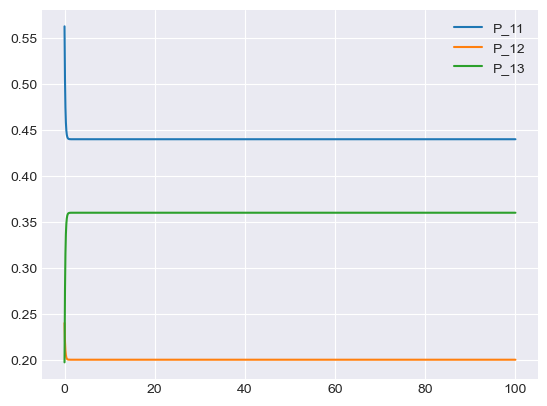

In [23]:
# Given a lambda matrix and a random probability matrix (with seed=0),
# calculate the steady state probabilities.
CTMC(lambda_matrix=lam_matrix, T=100, P=None).summary()

In [24]:
# We can access some attributes directly.
ctmc = CTMC(lambda_matrix=lam_matrix, T=100, P=None)
ctmc.pi

matrix([[0.44, 0.2 , 0.36]])

## M/M/C Queuing Model
Calculates the performance measures of an M/M/C queuing model.

In [25]:
# Given an arrival rate of .4, a process rate of .5, 2 servers,
# calculate the performance measures.
MMC(lam=.4, mu=.5, c=2)

ρ: 0.4000
π_0: 0.4286
u: 0.4000
L: 0.9524
L_q: 0.1524
W: 2.3810
W_q: 0.3810

In [26]:
# The same measures, but calculate 8 more pi values.
MMC(lam=.4, mu=.5, c=2, k=8)

ρ: 0.4000
π_0: 0.4286
π_8: 0.0014
u: 0.4000
L: 0.9524
L_q: 0.1524
W: 2.3810
W_q: 0.3810

In [27]:
# We can access some attributes directly here too.
mmc = MMC(lam=.4, mu=.5, c=2, k=8)
mmc.L_q

0.15238095238095242